In [ ]:
!pip install osmnx
!pip install scipy==1.8.0
!pip install haversine
!pip install icecream

import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import osmnx as ox
import numpy as np
import pandas as pd
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


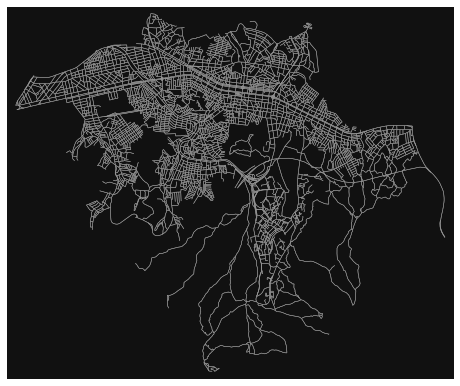

In [ ]:
G = ox.graph_from_place('관악구, 서울시, 대한민국', network_type='walk', simplify=True)

fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

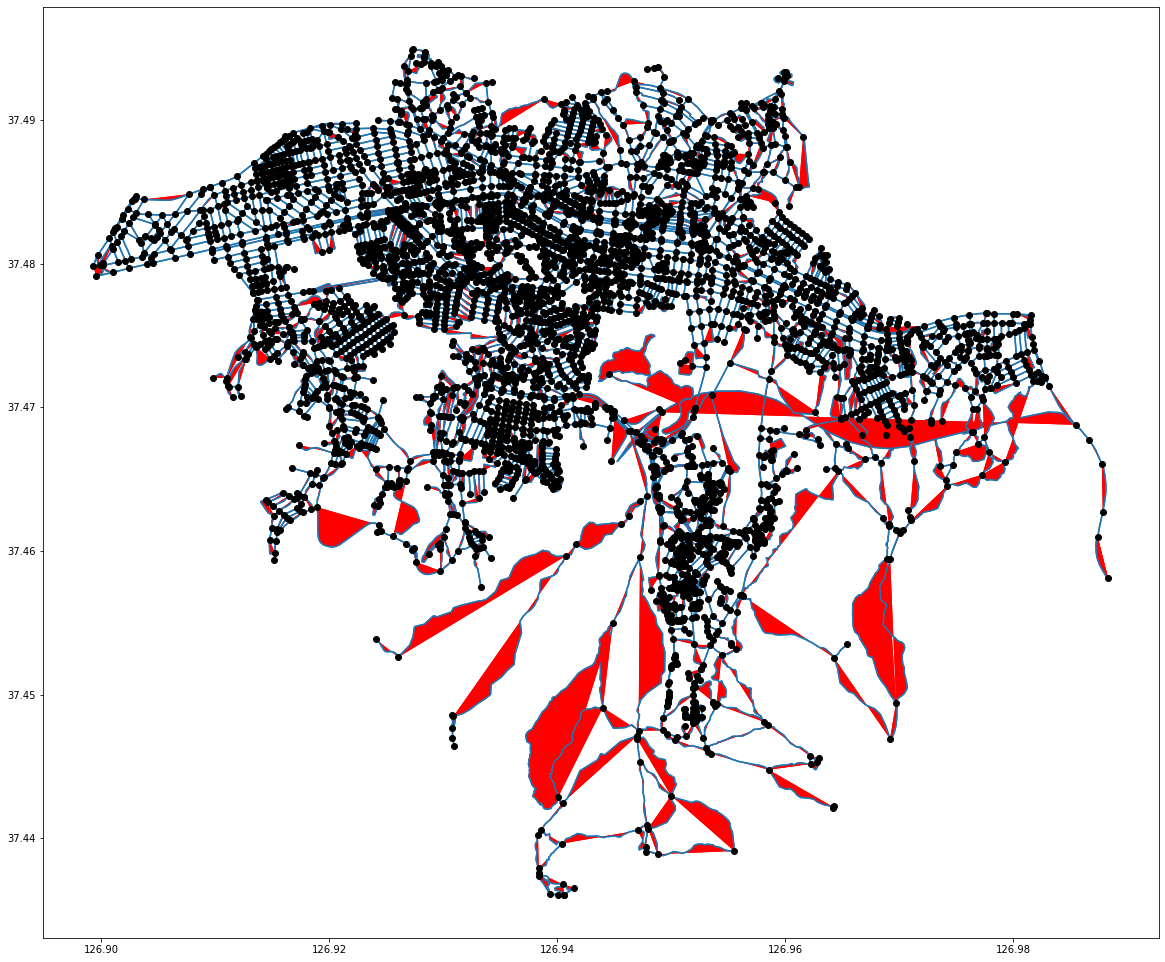

In [ ]:
import matplotlib.pyplot as plt

nodes, edges = ox.graph_to_gdfs(G)

# Plot the nodes
fig, ax = plt.subplots(figsize=(20,20))
edges.plot(ax=ax, facecolor='red')
nodes.plot(ax=ax, facecolor='black')
plt.show()

In [ ]:
demands = gpd.read_file('/content/demand.shp')
demands['geometry'] = demands['geometry'].to_crs(epsg=4326)
DNs = []
for i, node in enumerate(nodes['geometry']):
    for j, polygon in enumerate(demands['geometry']):
        if polygon.contains(node):
            DNs.append((nodes.index[i], demands['DN'][j]))

In [ ]:
np.unique(np.array([val for id, val in DNs]))

array([108, 166, 215, 255])

In [ ]:
enjoys = gpd.read_file('/content/enjoy.shp')
enjoys['geometry'] = enjoys['geometry'].to_crs(epsg=4326)
ENJOYs = []
for i, node in enumerate(nodes['geometry']):
    for j, polygon in enumerate(enjoys['geometry']):
        if polygon.contains(node):
            ENJOYs.append((nodes.index[i], enjoys['DN'][j]))

In [ ]:
np.unique(np.array([val for id, val in ENJOYs]))

array([ 52,  95, 153, 217])

In [ ]:
elders = gpd.read_file('/content/elder.shp')
elders['geometry'] = elders['geometry'].to_crs(epsg=4326)
ELD = []
for i, node in enumerate(nodes['geometry']):
    for j, polygon in enumerate(elders['geometry']):
        if polygon.contains(node):
            ELD.append((nodes.index[i], elders['DN'][j]))

In [ ]:
np.unique(np.array([val for id, val in ELD]))

array([ 94, 145, 188, 222, 246, 254, 255])

In [ ]:
demand = pd.DataFrame([[id , val] for id, val in DNs])
enjoy = pd.DataFrame([[id , val] for id, val in ENJOYs])
elder = pd.DataFrame([[id , val] for id, val in ELD])

In [ ]:
node_df = pd.DataFrame(nodes.index[:])
node_df.columns = ['id']

In [ ]:
node_df

id
0       357899357
1       436811684
2       436811700
3       436821534
4       436821642
...           ...
4925  10222189055
4926  10222189056
4927  10222189068
4928  10222189069
4929  10222189070

[4930 rows x 1 columns]

In [ ]:
df = pd.merge(left = pd.merge(left = elder , right = enjoy, how = "outer", on = 0), right = demand, how = "outer", on = 0)
df.columns = ['id', 'elder', 'enjoy', 'demand']

In [ ]:
final = pd.merge(left = node_df, right = df, how = 'outer', on = 'id')

In [ ]:
final

id  elder  enjoy  demand
0       357899357  254.0  153.0   166.0
1       436811684  222.0  217.0   215.0
2       436811700  222.0  217.0   166.0
3       436821534  188.0  153.0   215.0
4       436821642  254.0  153.0   215.0
...           ...    ...    ...     ...
4925  10222189055  254.0  153.0   108.0
4926  10222189056  254.0  153.0   108.0
4927  10222189068  254.0  153.0   108.0
4928  10222189069  254.0  153.0   108.0
4929  10222189070  254.0  153.0   108.0

[4930 rows x 4 columns]

In [ ]:
final = final.fillna(0)

In [ ]:
[108, 166, 215, 255]
final['demand'].replace(108, 1, inplace=True)
final['demand'].replace(166, 2, inplace=True)
final['demand'].replace(215, 3, inplace=True)
final['demand'].replace(255, 4, inplace=True)

In [ ]:
[ 52,  95, 153, 217]
final['enjoy'].replace(52, 1, inplace=True)
final['enjoy'].replace(95, 2, inplace=True)
final['enjoy'].replace(153, 3, inplace=True)
final['enjoy'].replace(217, 4, inplace=True)

In [ ]:
[ 94, 145, 188, 222, 246, 254, 255]
final['elder'].replace(94, 1, inplace=True)
final['elder'].replace(145, 2, inplace=True)
final['elder'].replace(188, 3, inplace=True)
final['elder'].replace(222, 4, inplace=True)
final['elder'].replace(246, 5, inplace=True)
final['elder'].replace(254, 6, inplace=True)
final['elder'].replace(255, 7, inplace=True)

In [ ]:
final

id  elder  enjoy  demand
0       357899357    6.0    3.0     2.0
1       436811684    4.0    4.0     3.0
2       436811700    4.0    4.0     2.0
3       436821534    3.0    3.0     3.0
4       436821642    6.0    3.0     3.0
...           ...    ...    ...     ...
4925  10222189055    6.0    3.0     1.0
4926  10222189056    6.0    3.0     1.0
4927  10222189068    6.0    3.0     1.0
4928  10222189069    6.0    3.0     1.0
4929  10222189070    6.0    3.0     1.0

[4930 rows x 4 columns]

In [ ]:
final.to_csv('elders.csv')

In [ ]:
loc = gpd.read_file('/content/loc.shp')
loc = loc.to_crs(epsg=4326)
# DNs = []
# for i, node in enumerate(nodes['geometry']):
#     for j, polygon in enumerate(demands['geometry']):
#         if polygon.contains(node):
#             DNs.append((nodes.index[i], demands['DN'][j]))

In [ ]:
loc

fid  sequence       fac_nam fac_type               addr              x  \
0      1.0      27.0     관악노인종합복지관  노인종합복지관     서울 관악구 보라매로 35  949288.346369   
1      2.0    2806.0           관악정      경로당    서울 관악구 과천대로 851  954659.995405   
2      3.0    2793.0         삼성(아)      경로당     서울 관악구 관악로 125  951551.357208   
3      4.0    2792.0       건영6차(아)      경로당     서울 관악구 관악로 133  951552.691069   
4      5.0    2772.0    성현동아(아)1단지      경로당     서울 관악구 관악로 285  951859.598112   
..     ...       ...           ...      ...                ...            ...   
124  125.0     368.0      신원예닮노인교실     노인교실  서울 관악구 신원로3길 59-9  949171.981880   
125  126.0     382.0    하상시니어 아카데미     노인교실     서울 관악구 쑥고개로 79  950970.509137   
126  127.0     375.0        성림노인교실     노인교실     서울 관악구 원신길 150  949578.314267   
127  128.0     373.0  천주교중앙동교회노인교실     노인교실     서울 관악구 은천로 174  951745.244629   
128  129.0     376.0       삼성산노인교실     노인교실     서울 관악구 호암로 545  949698.605135   

                y  fac_area demand                    geometry  
0    1.943909e+06   3152.00   None  POINT (126.92633 37.49304)  
1    1.940938e+06     29.75   None  POINT (126.98728 37.46655)  
2    1.942058e+06     52.15   None  POINT (126.95205 37.47648)  
3    1.942108e+06    151.28   None  POINT (126.95206 37.47693)  
4    1.943489e+06    231.04   None  POINT (126.95544 37.48939)  
..            ...       ...    ...                         ...  
124  1.942729e+06     88.00   None  POINT (126.92510 37.48240)  
125  1.942411e+06     99.00   None  POINT (126.94546 37.47963)  
126  1.940963e+06     79.00   None  POINT (126.92981 37.46650)  
127  1.943079e+06     86.00   None  POINT (126.95418 37.48570)  
128  1.940960e+06    201.00   None  POINT (126.93117 37.46648)  

[129 rows x 10 columns]

In [ ]:
ids = []
for point in loc['geometry']:
    x, y = point.x, point.y
    id = ox.distance.nearest_nodes(G, x, y)
    ids.append(id)
ids

[10149658150,
 4867774123,
 1843514225,
 1843514225,
 2477234771,
 2825728929,
 2824756338,
 8482861592,
 2824756464,
 8482847651,
 2162056334,
 1843514229,
 2160502061,
 1844752514,
 7259723008,
 4626274474,
 4373539412,
 5283032614,
 1872054441,
 1872054441,
 4140716857,
 2824730064,
 2876976271,
 4124780272,
 4116466791,
 1936304546,
 1936304546,
 1936304546,
 1936304546,
 2824629068,
 4116466791,
 4116466791,
 2824626137,
 4124781212,
 4124781063,
 4124781048,
 2824421273,
 2824421286,
 2824633379,
 2824617385,
 2824632229,
 4127278936,
 2824642883,
 1915358661,
 1834823222,
 2160502090,
 4196322504,
 9990748107,
 2254642557,
 4619723939,
 2834984809,
 2834984814,
 2834984801,
 2824618322,
 2824618309,
 4370539557,
 4127271850,
 4127199213,
 4127273412,
 2824621804,
 2824603239,
 4626145911,
 1843750959,
 4619715201,
 1843751082,
 4370542523,
 7607455970,
 2254642434,
 2824692734,
 1845153552,
 2841340158,
 2045931982,
 7097412850,
 2824644602,
 1834198781,
 4373539283,
 3021942800

In [ ]:
final['facility'] = 0
for i, id in enumerate(final['id']):
    if id in ids:
        final['facility'][i] = 1
final

<ipython-input-27-e2067f35f7f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['facility'][i] = 1


id  elder  enjoy  demand  facility
0       357899357    6.0    3.0     2.0         0
1       436811684    4.0    4.0     3.0         1
2       436811700    4.0    4.0     2.0         0
3       436821534    3.0    3.0     3.0         0
4       436821642    6.0    3.0     3.0         0
...           ...    ...    ...     ...       ...
4925  10222189055    6.0    3.0     1.0         0
4926  10222189056    6.0    3.0     1.0         0
4927  10222189068    6.0    3.0     1.0         0
4928  10222189069    6.0    3.0     1.0         0
4929  10222189070    6.0    3.0     1.0         0

[4930 rows x 5 columns]

In [ ]:
final.to_csv('final.csv')

In [ ]:
final = pd.read_csv('final.csv')

In [ ]:
ad_mat = nx.adjacency_matrix(G)

ad_mat = np.clip(ad_mat.todense(), 0, 1)

<ipython-input-109-22e8651341a2>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  ad_mat = nx.adjacency_matrix(G)


In [ ]:
points = {i : (point.y, point.x) for i, point in enumerate(nodes['geometry'])}

D = np.zeros(shape=(len(nodes), len(nodes)))
for i, row in enumerate(ad_mat):
    index = np.where(row == 1)[1]
    for j in index:
        D[i][j] = haversine(points[i], points[j])

In [ ]:
points = {i : (point.y, point.x) for i, point in enumerate(nodes['geometry'])}

D = np.zeros(shape=(len(nodes), len(nodes)))
for i, row in enumerate(ad_mat):
    index = np.where(row == 1)[1]
    for j in index:
        D[i][j] = haversine(points[i], points[j])

In [ ]:
for row in D:
    index = np.where(row > 0)[0]

In [ ]:
final['score'] = np.exp(-final['elder']-final['demand']/4+final['enjoy']/4+final['facility'])

In [ ]:
score = final['score'].values.reshape(1, -1)
i_D_A = np.multiply(ad_mat, 1/(D+1e-3))
facility = final['facility'].values.reshape(-1, 1)

K = score @ i_D_A

In [ ]:
original = np.where(final['facility'].values == 1)[0]
sample_index = np.where(final['facility'].values == 0)[0]

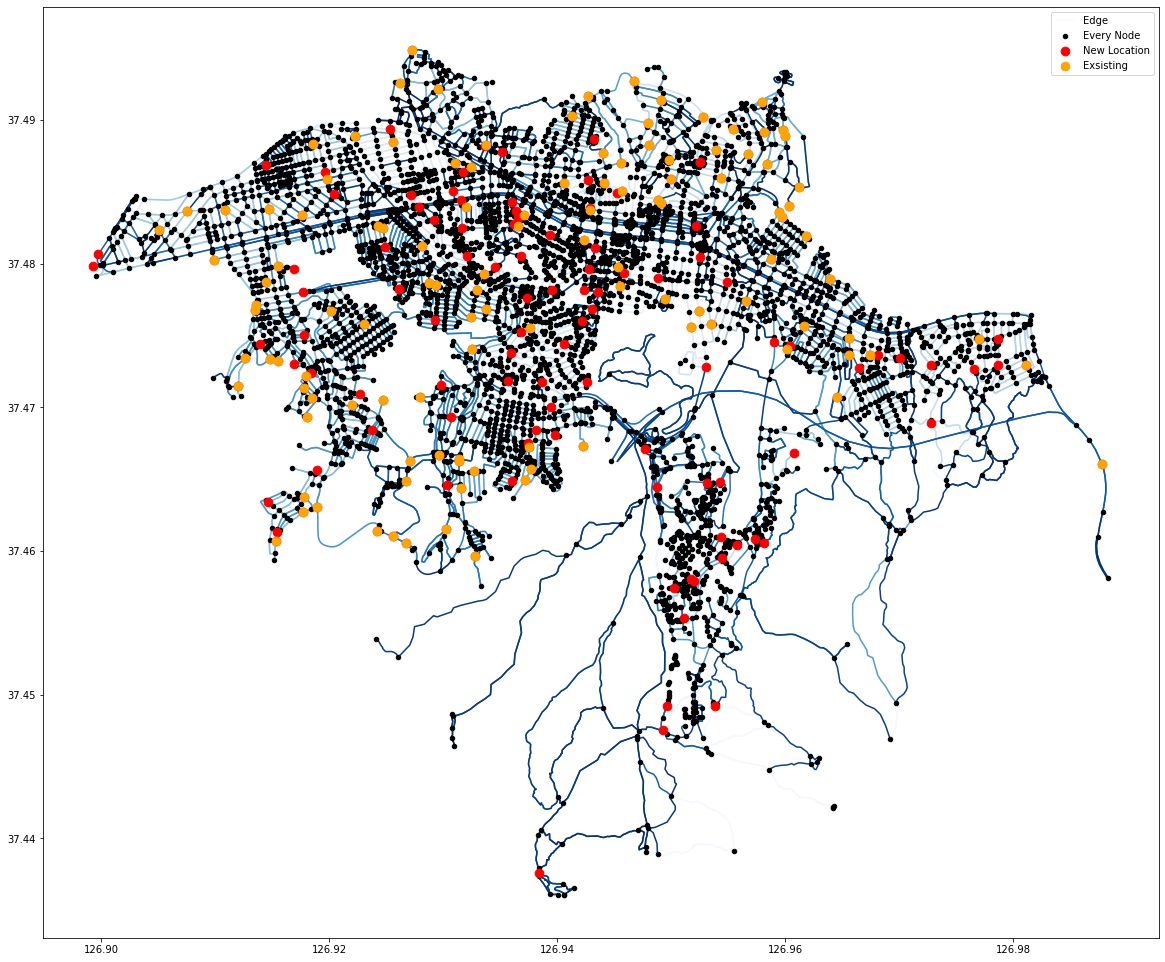

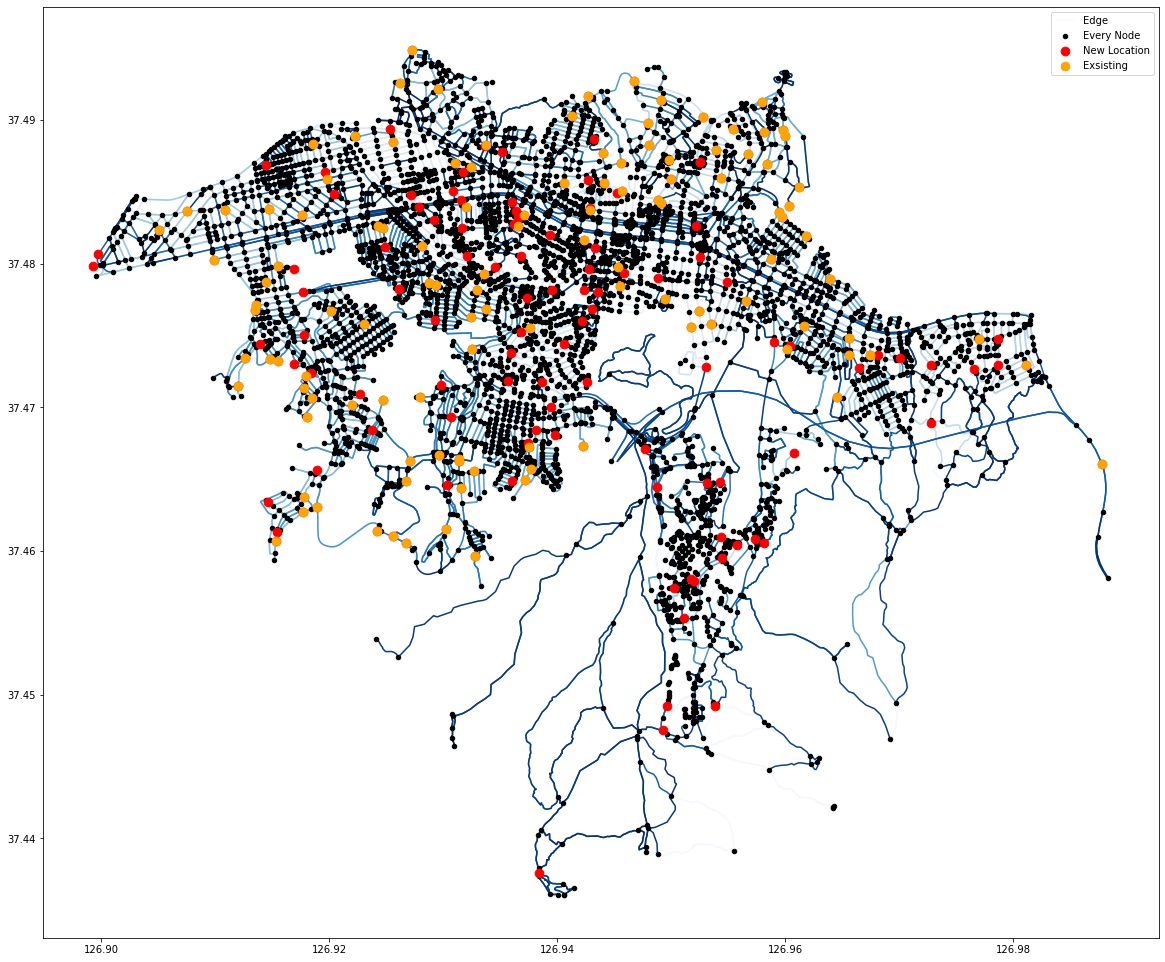

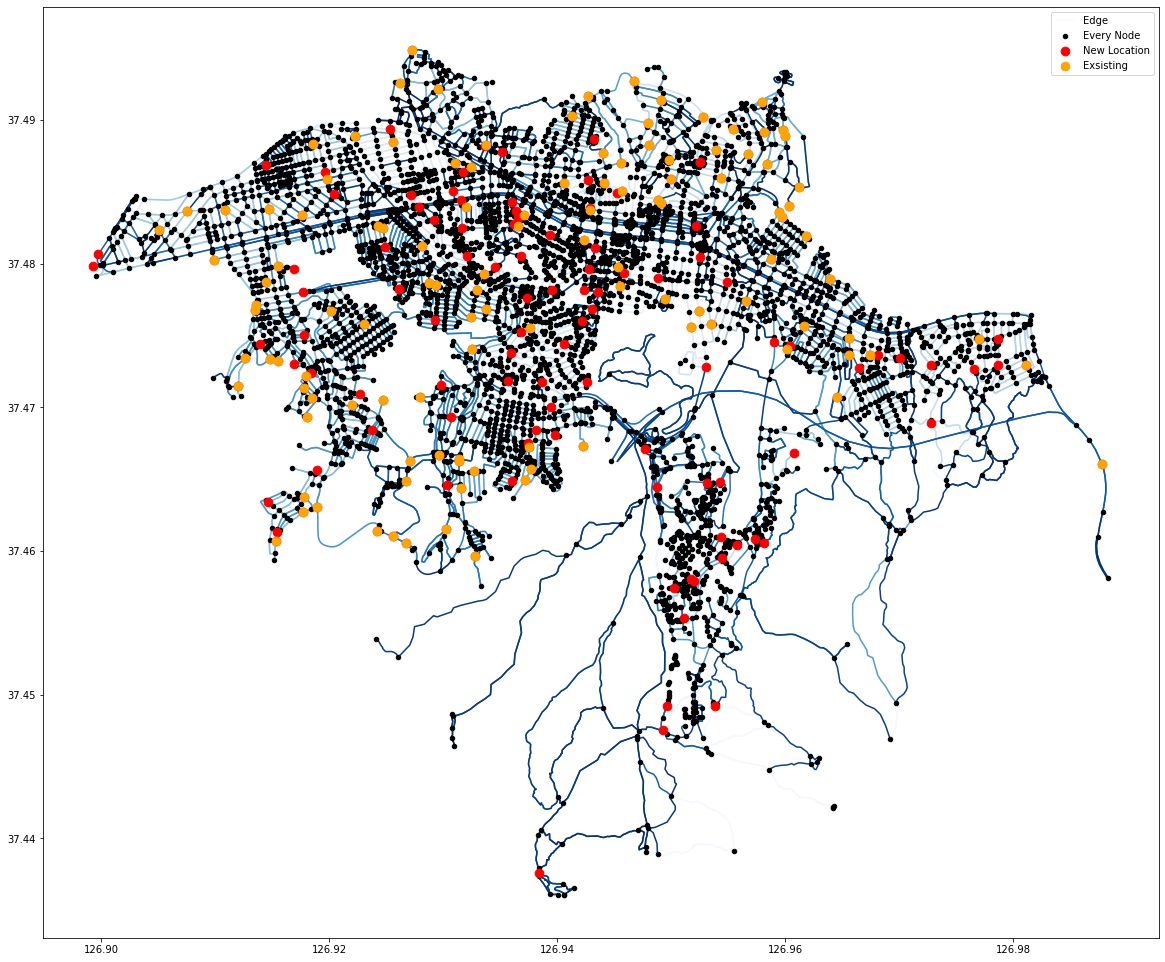

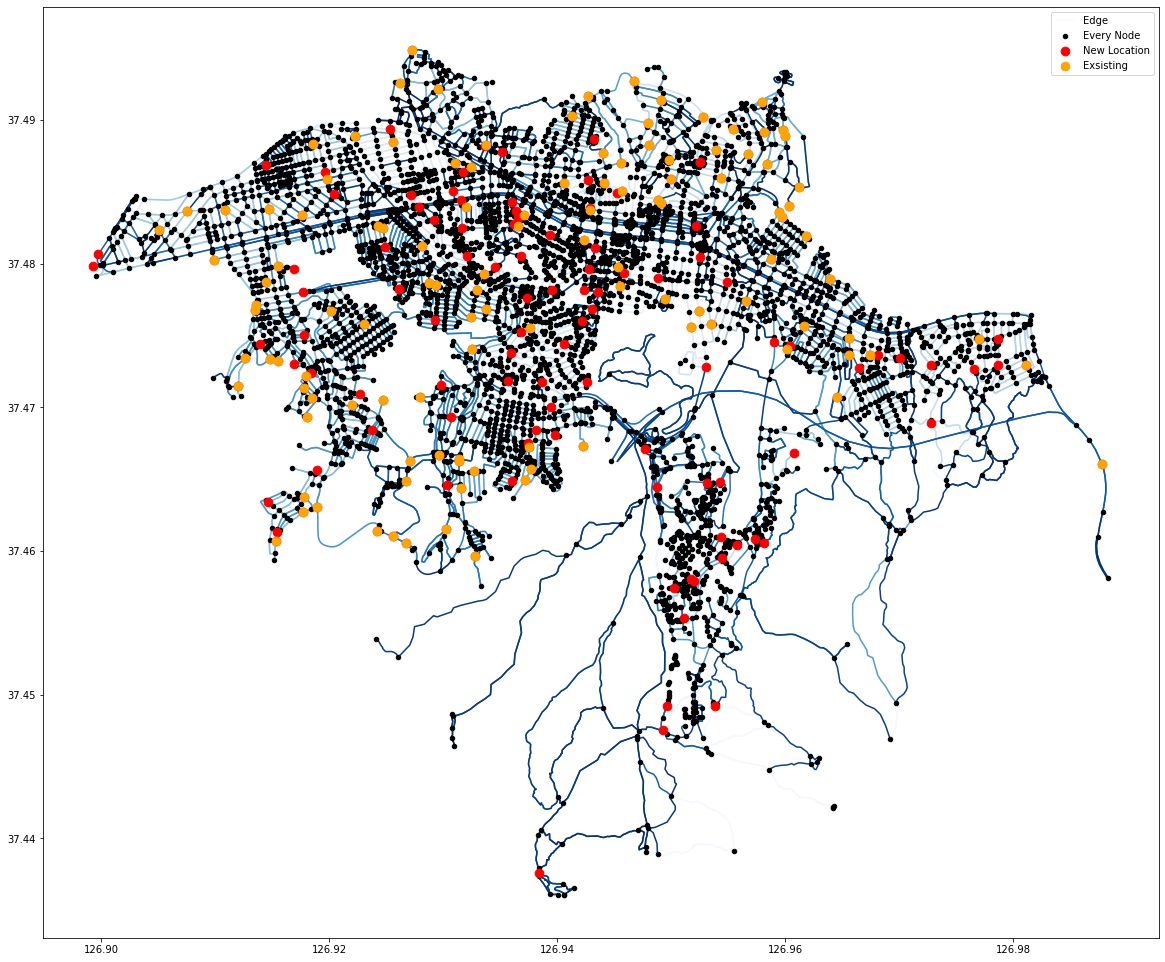

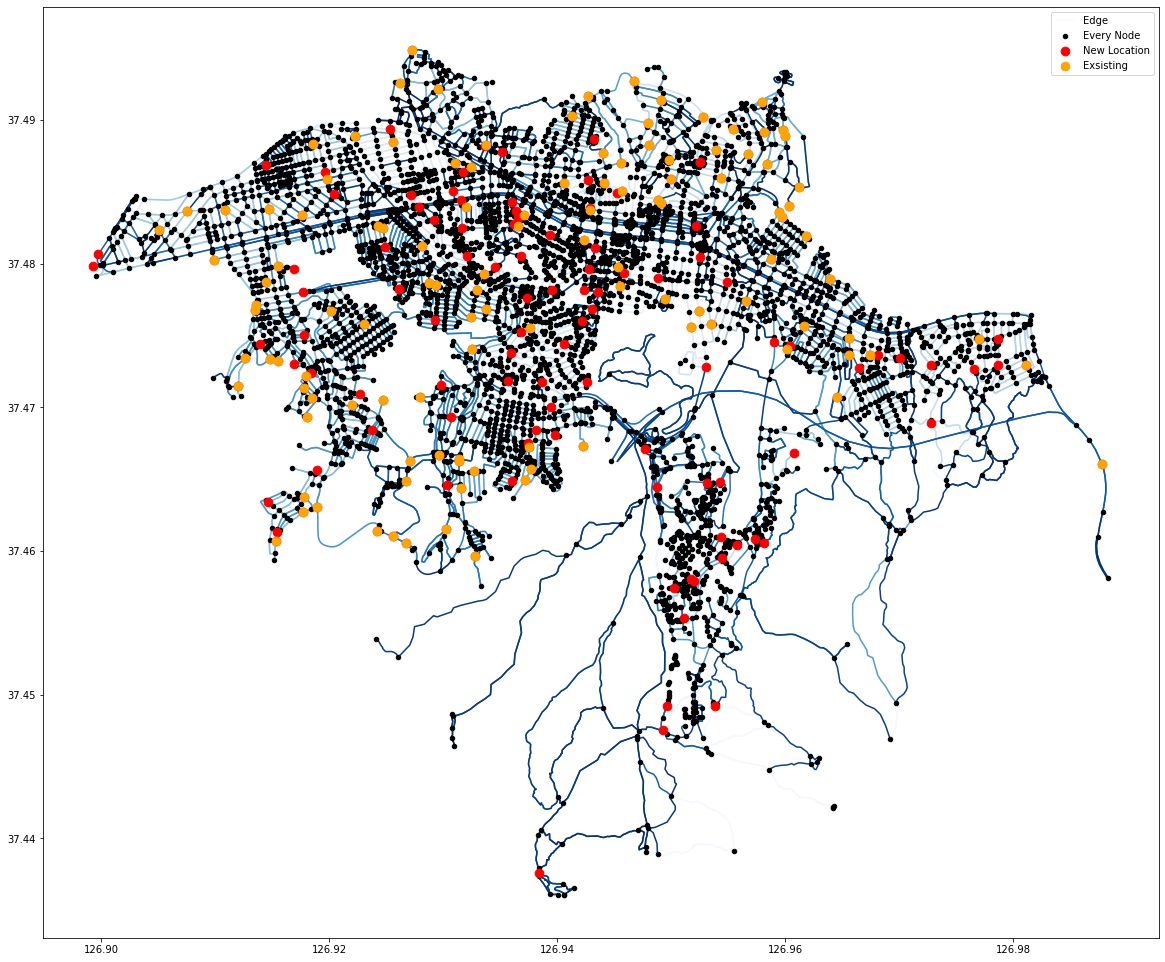

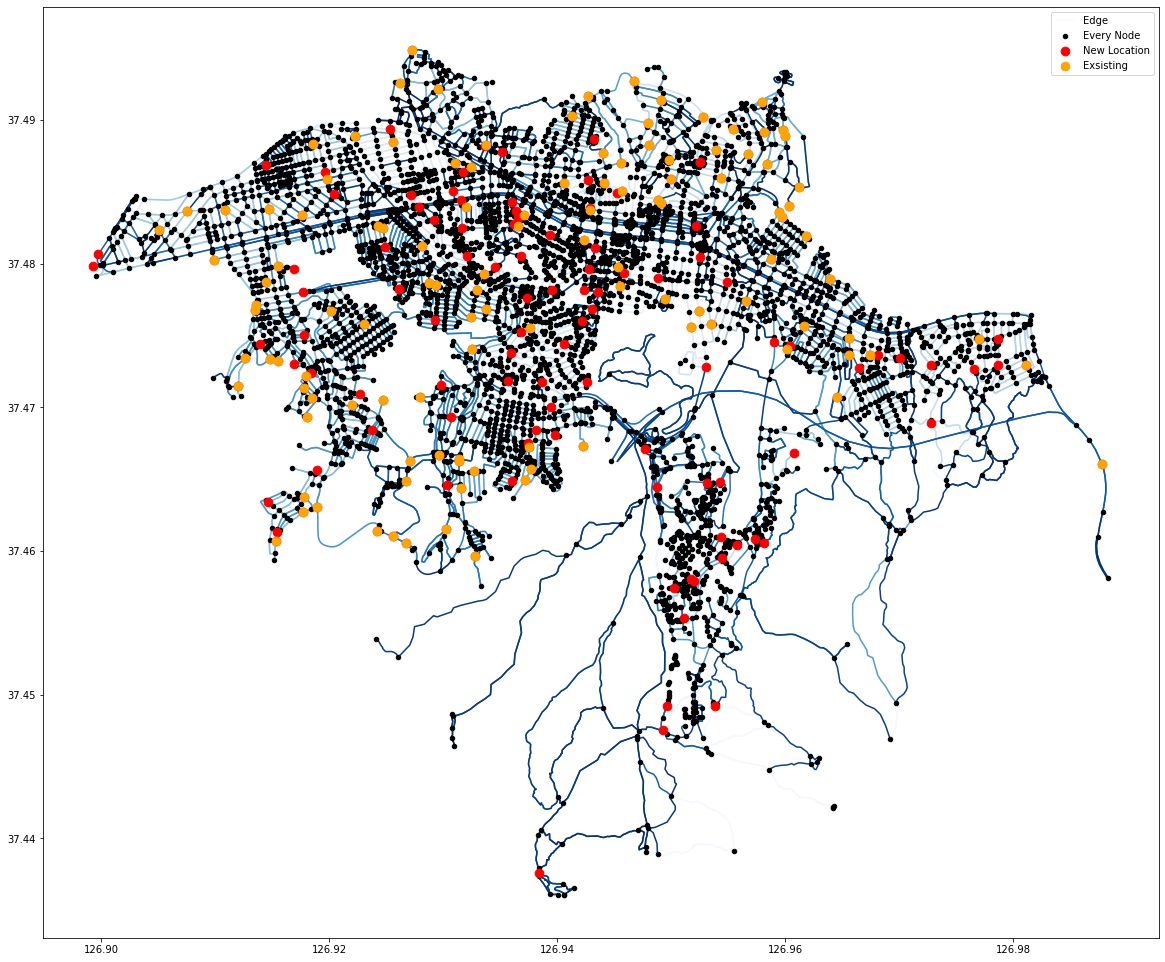

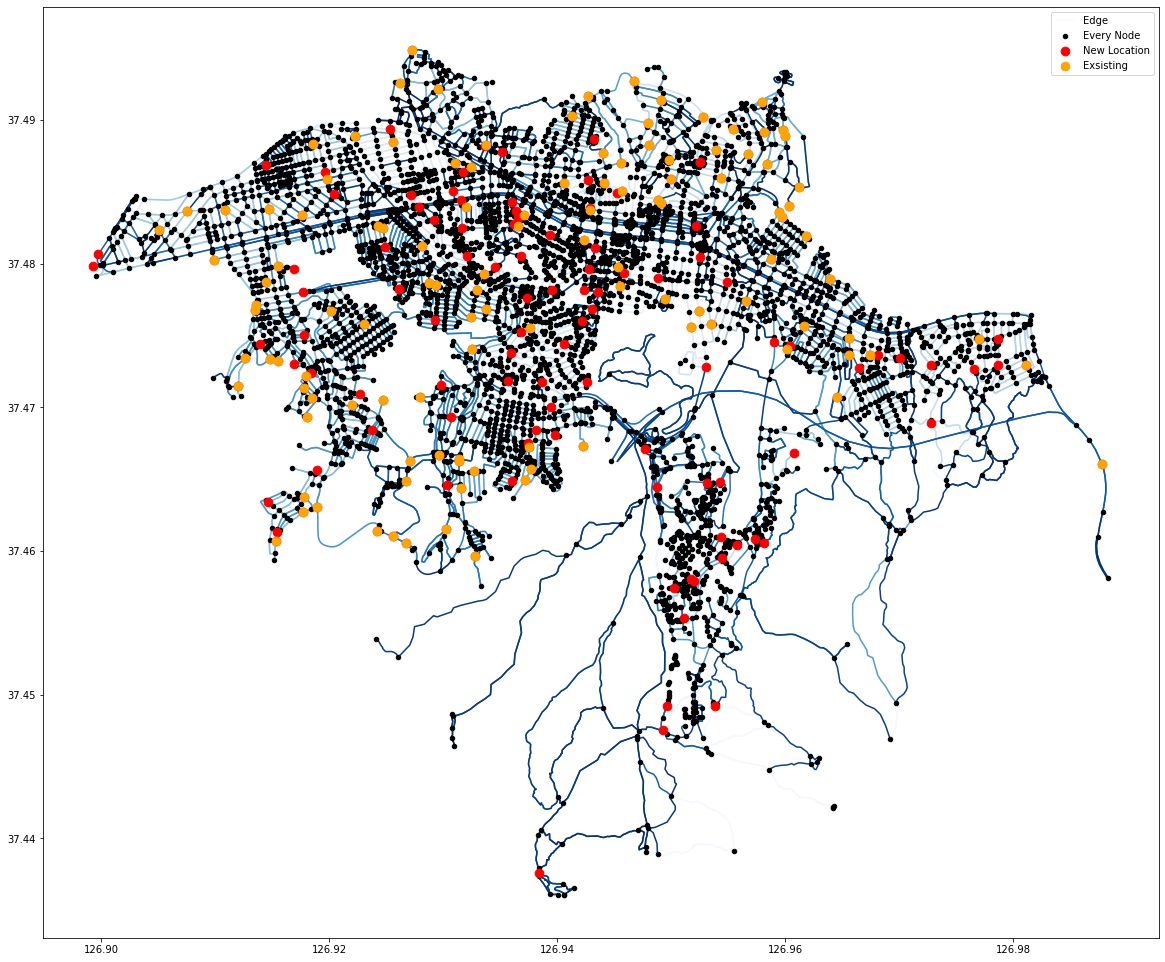

In [ ]:
from tqdm import tqdm 
from icecream import ic

# def dist_regulizer(facil_array):
#     dist_regul = 0
#     for i, access in enumerate(facil_array):
#         if access:
#             index  = np.where(ad_mat[i, :] == 1)[1]
#             for j in index:
#                 dist_regul += D[i][j]
#     return dist_regul


def calculator(index_of_sample, reg_hp):
    objective = 0
    sampled_facil = facility[:]
    sampled_facil[index_of_sample] = 1
    for k in range(1, 3+1):
        objective += (1/k**2 * K @ sampled_facil)
                    #   + reg_hp * dist_regulizer(sampled_facil))
    return objective


def fittness_check(samples, reg_hp):
    fit = [calculator(index_of_sample, reg_hp) for index_of_sample in samples]
    return np.asarray(fit)


def crossover(samples, offspring_size, k):
    total_offspring = list()
    for _ in range(offspring_size):
        tmp1, tmp2 = np.random.choice(len(samples), size=2, replace=True)
        output = np.concatenate((samples[tmp1], samples[tmp2]))
        output = np.unique(output)
        output = np.random.choice(output, original.size + k)
        total_offspring.append(output)
    return np.asarray(total_offspring)


def random_sample_generator(k):
    new_indexes = np.random.choice(sample_index, k)
    new_indexes = np.concatenate([original, new_indexes])
    return new_indexes


def mutation(samples, k):
    total_pop = list()
    for member in samples:
        if np.random.uniform(0,1,1)<0.2 : 
            tmp = random_sample_generator(k)
            total_pop.append(tmp)
        else:
            total_pop.append(member)
    return np.asarray(total_pop)

def optimal_chromosome(fit_value, optimal_sample):
    total_optimal = list()
    for _ in range(optimal_sample):
        optimal = np.argmin(fit_value)
        total_optimal.append(optimal)
        fit_value[optimal] = 999999
    return np.asarray(total_optimal)

from IPython.display import clear_output
import time

k = 100
pop_num = 100
samples = np.asarray([random_sample_generator(k) for _ in range(pop_num)])
optimal_sample = 20
num_iteration = 25
fit_value = fittness_check(samples, 1)
initial_sample = samples[:]

for _ in range(num_iteration):
    optimal_index = optimal_chromosome(fit_value, optimal_sample) 
    parents =  [samples[optimal_index[i]] for i in range(optimal_sample)]
    offspring = crossover(parents, pop_num-optimal_sample, k)
    offspring = mutation(offspring, k)
    samples = np.concatenate((parents, offspring), axis=0)
    fit_value = fittness_check(samples, 1)
    news = nodes.iloc[samples[optimal_index][0]]
    init = nodes.iloc[original]

    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(20,20))
    edges.plot(ax=ax, cmap='Blues', zorder=0, label='Edge')
    nodes.plot(ax=ax, facecolor='Black', markersize=20, label='Every Node')
    news.plot(ax=ax, facecolor='red',  markersize=75, label='New Location')
    init.plot(ax=ax, facecolor='orange',  markersize=75, label='Exsisting')
    plt.show()
    time.sleep(1)
    

In [ ]:
news = nodes.iloc[samples[optimal_index][0]]
init = nodes.iloc[original]

<AxesSubplot: >

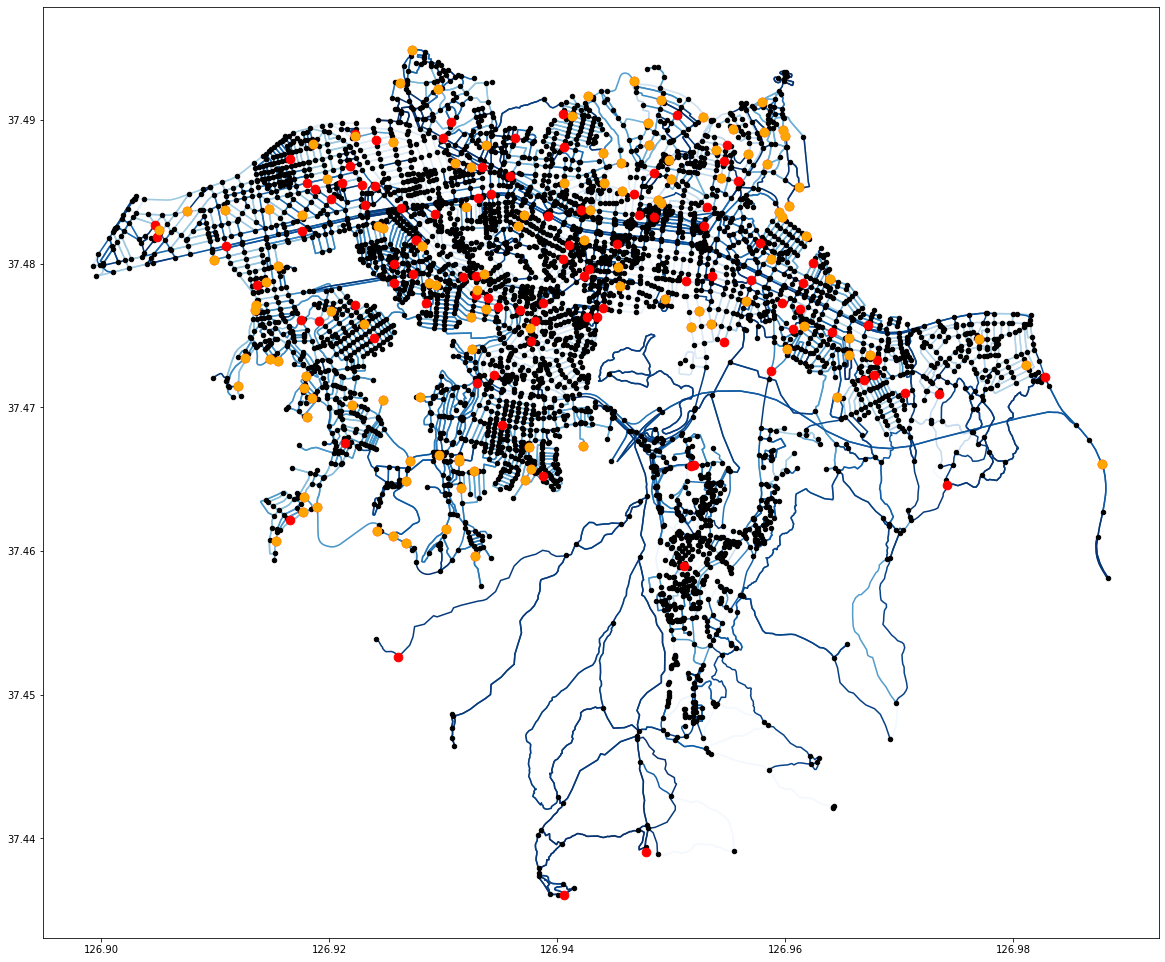

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

edges.plot(ax=ax, cmap='Blues', zorder=0)
nodes.plot(ax=ax, facecolor='Black', markersize=20)
news.plot(ax=ax, facecolor='red',  markersize=75)
init.plot(ax=ax, facecolor='orange',  markersize=75)

In [ ]:
nodes.iloc[samples[optimal_index[0]], :].plot(ax=ax, facecolor='red')

<AxesSubplot: >

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.show()

In [ ]:
nodes.sort_values(by='osmid')['enjoy'] = final.sort_values(by='id')['enjoy']

<AxesSubplot: >

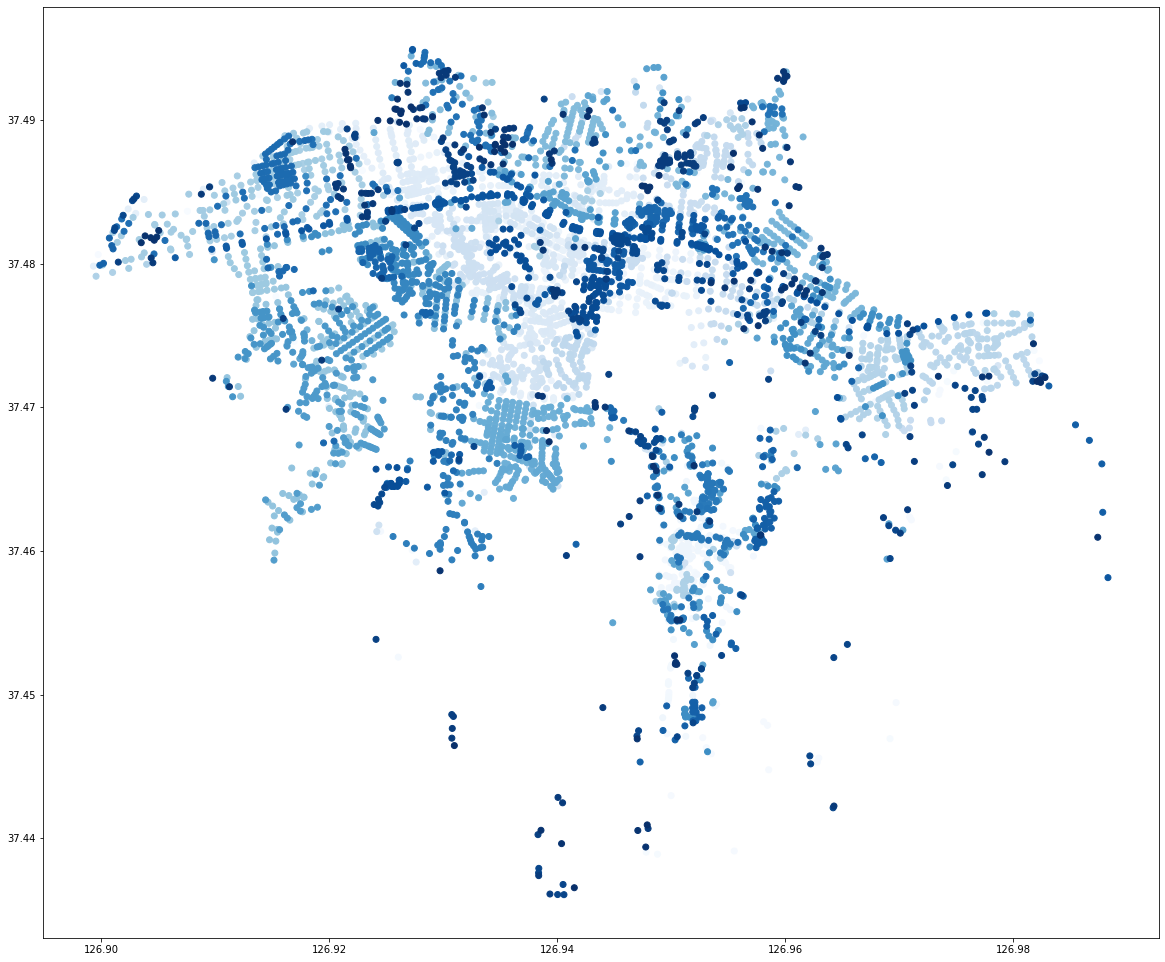

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
nodes.plot(ax=ax, label='enjoy', cmap='Blues')